In [1]:
from eval import (
    compute_final_min_mae,
    compute_min_maes,
    compute_target_size,
    get_maes,
    load_eval_data,
    median_best_mae,
    median_final_mae,
    median_steps_to_convergence,
    median_steps_to_threshold,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    plot_target_beam_size_mae_correlation,
)


In [2]:
def full_evaluation(rl, bo) -> None:
    print(f"Evaluating rl = {len(rl)} vs. bo = {len(bo)} problems")

    print_seperator()

    print(f"RL -> {median_steps_to_threshold(rl)}")
    print(f"BO -> {median_steps_to_threshold(bo)}")
    plot_steps_to_threshold_box({"RL": rl, "BO": bo})

    print_seperator()

    print(f"RL -> {median_steps_to_convergence(rl)}")
    print(f"BO -> {median_steps_to_convergence(bo)}")

    plot_steps_to_convergence_box({"RL": rl, "BO": bo})

    print_seperator()

    plot_mae_over_time({"RL": rl, "BO": bo})

    print_seperator()

    plot_best_mae_over_time({"RL": rl, "BO": bo})

    print_seperator()

    print(f"RL -> {median_final_mae(rl)}")
    print(f"BO -> {median_final_mae(bo)}")

    plot_final_mae_box({"RL": rl, "BO": bo})

    print_seperator()

    print(f"RL -> {median_best_mae(rl)}")
    print(f"BO -> {median_best_mae(bo)}")

    plot_best_mae_box({"RL": rl, "BO": bo})


def print_seperator() -> None:
    print("-----------------------------------------------------------")


In [3]:
rl = load_eval_data("bo_rl_opponent_evaluation")
bo = load_eval_data("bo_evaluation")


### All runs (simulation)

Evaluating rl = 300 vs. bo = 300 problems
-----------------------------------------------------------
RL -> 9.0
BO -> 152.0


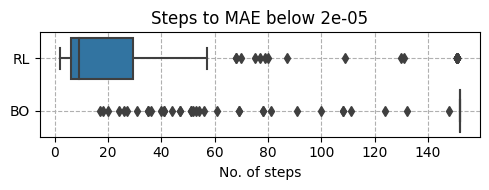

-----------------------------------------------------------
RL -> 7.0
BO -> 32.0


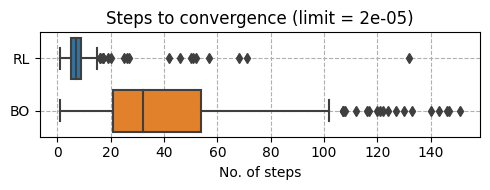

-----------------------------------------------------------


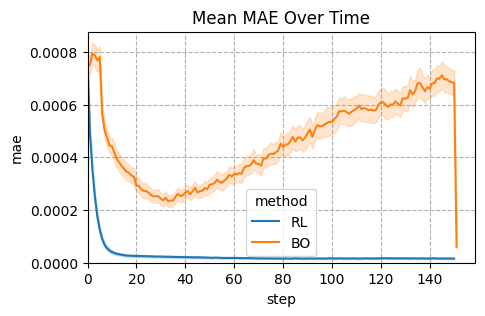

-----------------------------------------------------------


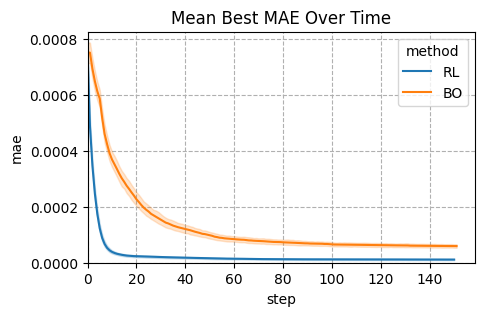

-----------------------------------------------------------
RL -> 7.071090067256591e-06
BO -> 0.0005660077149514109


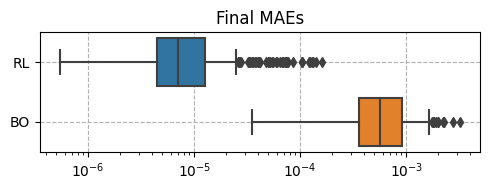

-----------------------------------------------------------
RL -> 4.440665406946209e-06
BO -> 4.5300330384634435e-05


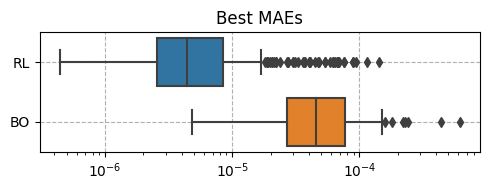

In [4]:
full_evaluation(rl, bo)


### Small beam runs (simulation)

Evaluating rl = 27 vs. bo = 27 problems
-----------------------------------------------------------
RL -> 28.0
BO -> 152.0


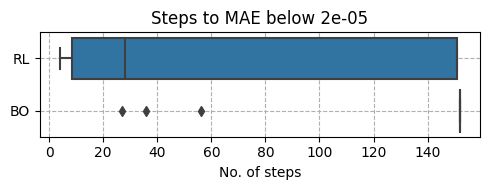

-----------------------------------------------------------
RL -> 6.0
BO -> 27.0


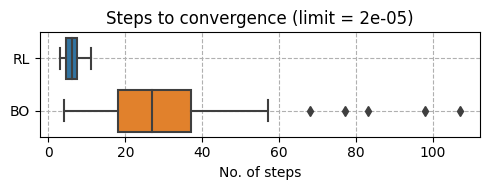

-----------------------------------------------------------


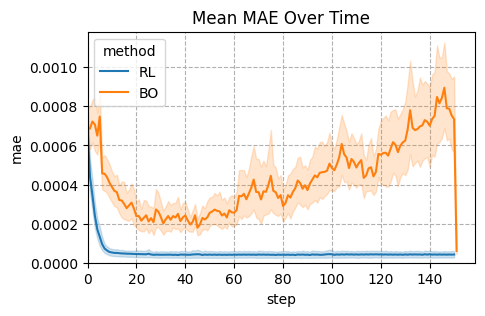

-----------------------------------------------------------


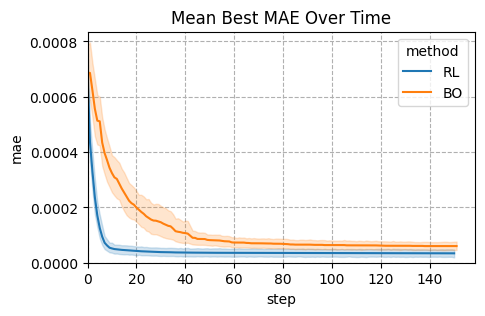

-----------------------------------------------------------
RL -> 1.6785850675660186e-05
BO -> 0.0005999708664603531


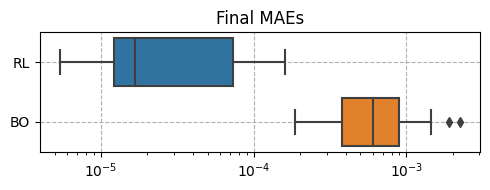

-----------------------------------------------------------
RL -> 1.674404484219849e-05
BO -> 4.337483551353216e-05


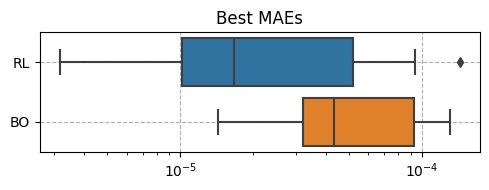

In [5]:
full_evaluation(rl[:27], bo[:27])


### Large beam runs (simulation)

Evaluating rl = 273 vs. bo = 273 problems
-----------------------------------------------------------
RL -> 9.0
BO -> 152.0


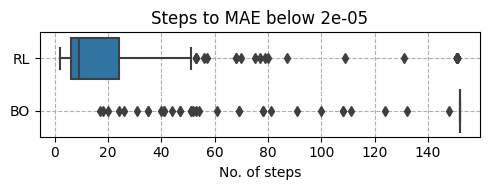

-----------------------------------------------------------
RL -> 7.0
BO -> 32.0


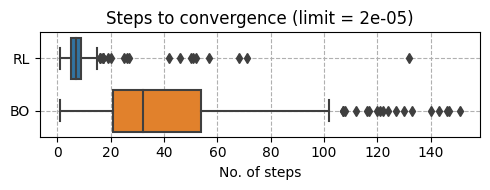

-----------------------------------------------------------


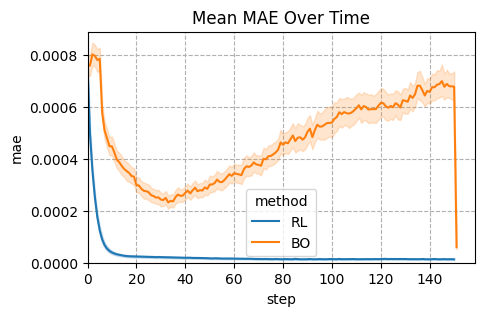

-----------------------------------------------------------


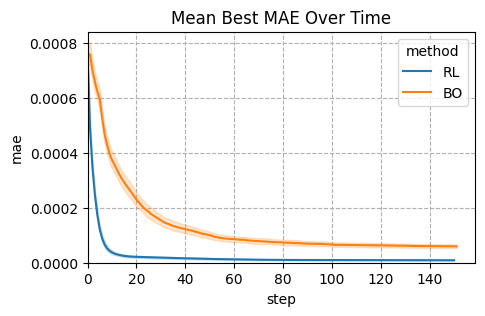

-----------------------------------------------------------
RL -> 6.393906005541794e-06
BO -> 0.0005613598041236401


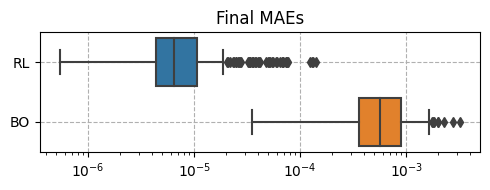

-----------------------------------------------------------
RL -> 4.168592568021268e-06
BO -> 4.5722321374341846e-05


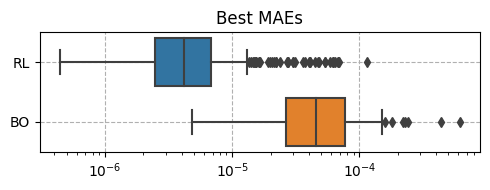

In [6]:
full_evaluation(rl[27:], bo[27:])


### Only the first beam run

Evaluating rl = 1 vs. bo = 1 problems
-----------------------------------------------------------
RL -> 151.0
BO -> 152.0


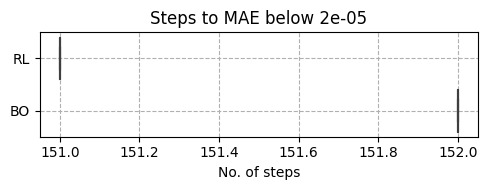

-----------------------------------------------------------
RL -> 3.0
BO -> 4.0


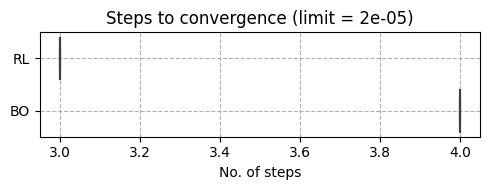

-----------------------------------------------------------


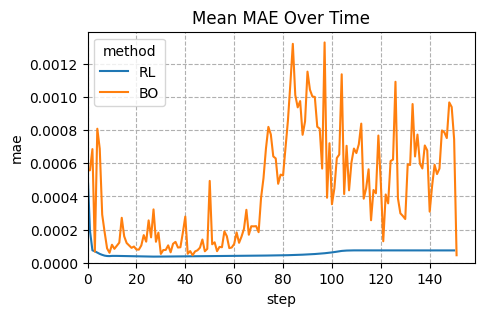

-----------------------------------------------------------


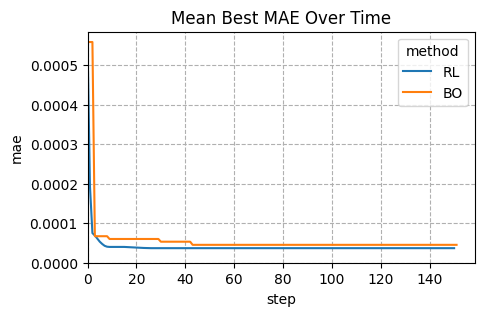

-----------------------------------------------------------
RL -> 7.43193959351629e-05
BO -> 0.0007456659805029631


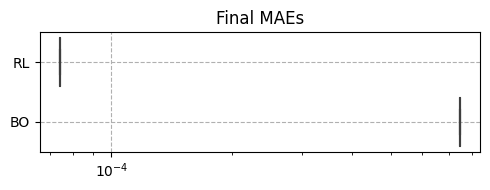

-----------------------------------------------------------
RL -> 3.682381066028029e-05
BO -> 4.5236734877107665e-05


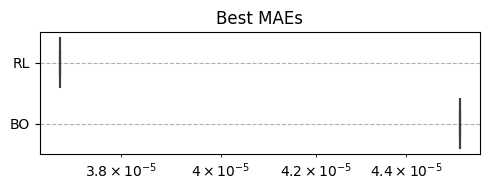

In [7]:
full_evaluation(rl[:1], bo[:1])


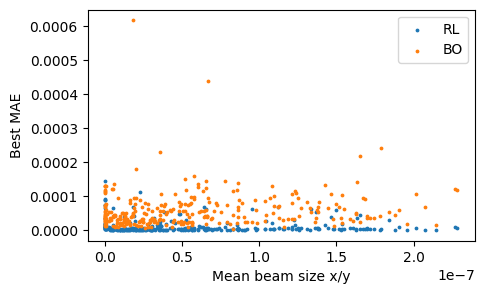

In [8]:
plot_target_beam_size_mae_correlation(rl, bo)


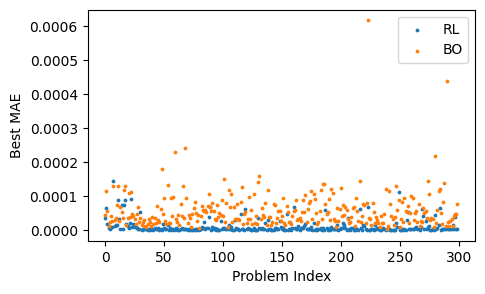

In [10]:
plot_best_mae_over_problem(rl, bo)


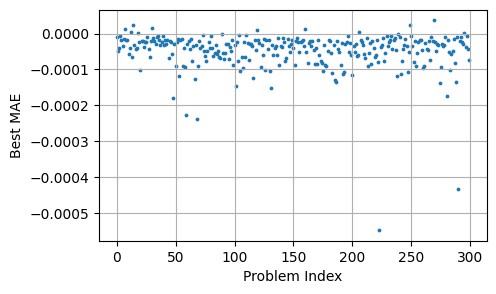

In [11]:
plot_best_mae_diff_over_problem(rl, bo)


## Real data

In [12]:
rl_real = load_eval_data("kit_shift_data/rl")
bo_real = load_eval_data("kit_shift_data/bo")


Evaluating rl = 8 vs. bo = 8 problems
-----------------------------------------------------------
RL -> 51.0
BO -> 77.0


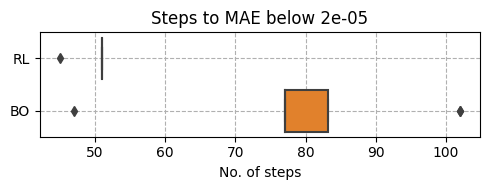

-----------------------------------------------------------
RL -> 6.0
BO -> 21.5


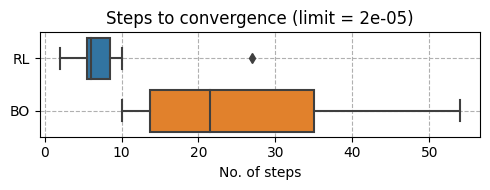

-----------------------------------------------------------


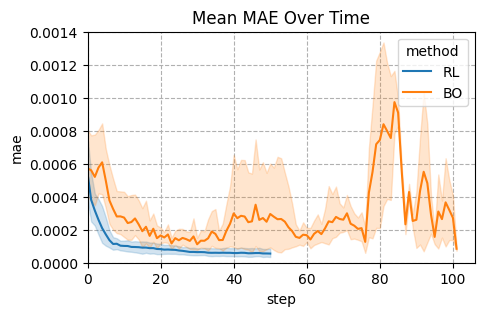

-----------------------------------------------------------


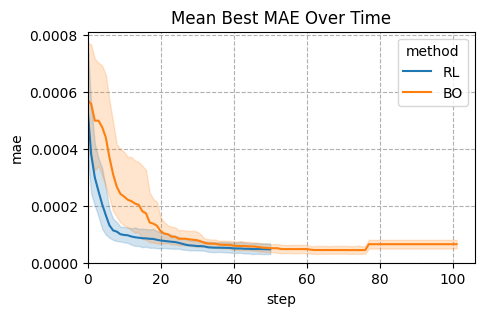

-----------------------------------------------------------
RL -> 4.3795895180664957e-05
BO -> 0.00014819564239587635


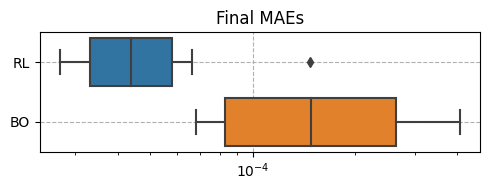

-----------------------------------------------------------
RL -> 4.116049603908323e-05
BO -> 3.9224716601893306e-05


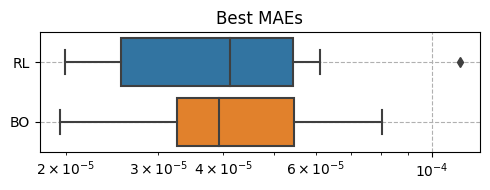

In [13]:
full_evaluation(rl_real, bo_real)

### Small beams

Evaluating rl = 7 vs. bo = 7 problems
-----------------------------------------------------------
RL -> 51.0
BO -> 77.0


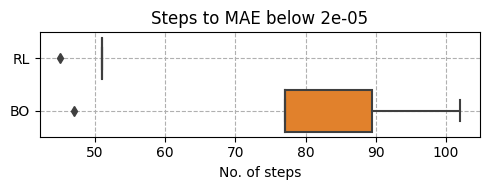

-----------------------------------------------------------
RL -> 6.0
BO -> 17.0


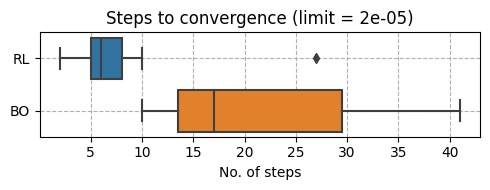

-----------------------------------------------------------


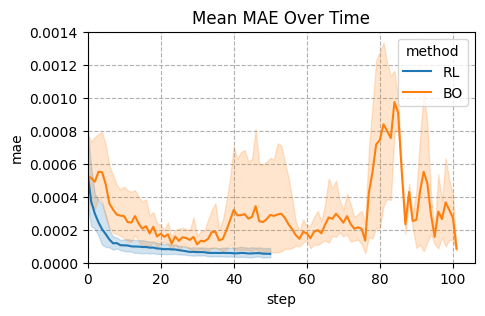

-----------------------------------------------------------


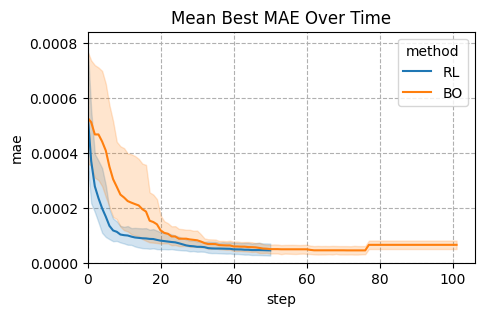

-----------------------------------------------------------
RL -> 3.720316453836858e-05
BO -> 0.00013765363837592304


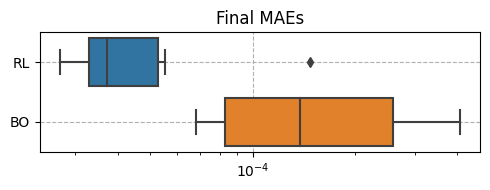

-----------------------------------------------------------
RL -> 3.32603303832002e-05
BO -> 3.7836605770280585e-05


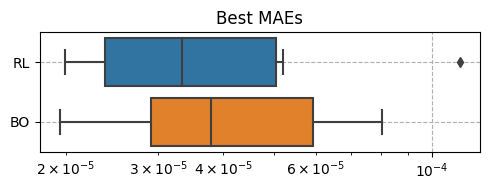

In [15]:
full_evaluation(rl_real[:-1], bo_real[:-1])

### Large Beam(s)

Evaluating rl = 1 vs. bo = 1 problems
-----------------------------------------------------------
RL -> 51.0
BO -> 77.0


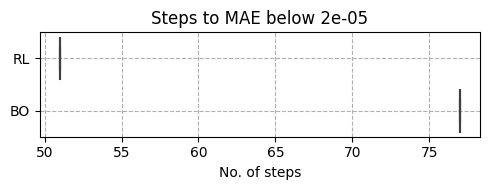

-----------------------------------------------------------
RL -> 8.0
BO -> 54.0


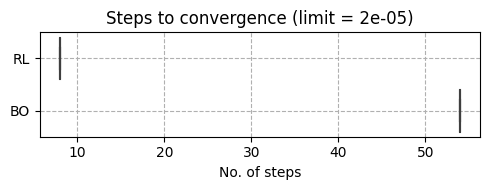

-----------------------------------------------------------


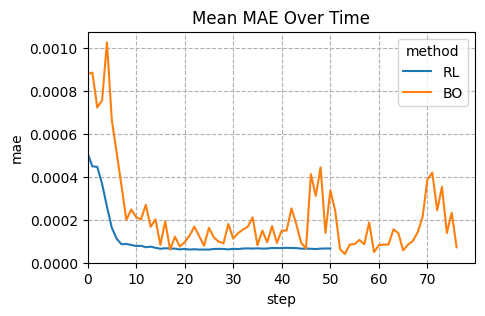

-----------------------------------------------------------


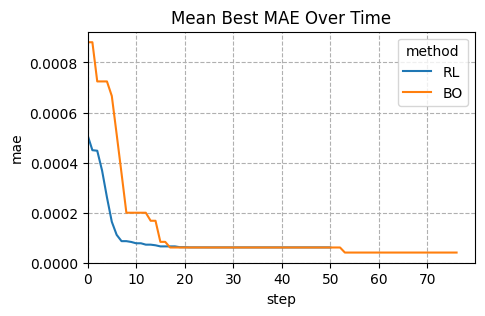

-----------------------------------------------------------
RL -> 6.621646753046662e-05
BO -> 0.00023333390709012747


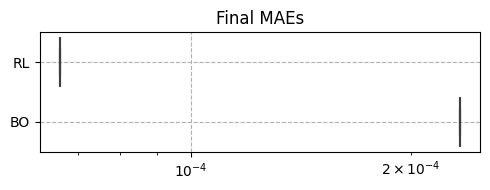

-----------------------------------------------------------
RL -> 6.118914461694658e-05
BO -> 4.061282743350603e-05


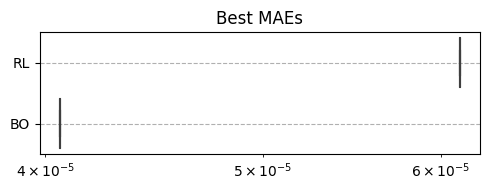

In [16]:
full_evaluation(rl_real[-1:], bo_real[-1:])

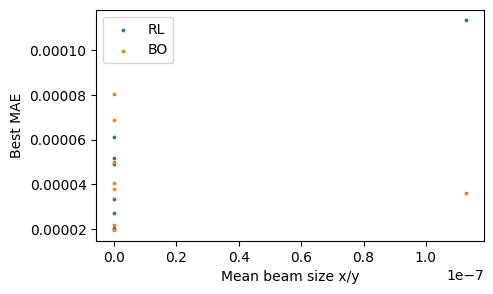

In [17]:
plot_target_beam_size_mae_correlation(rl_real, bo_real)


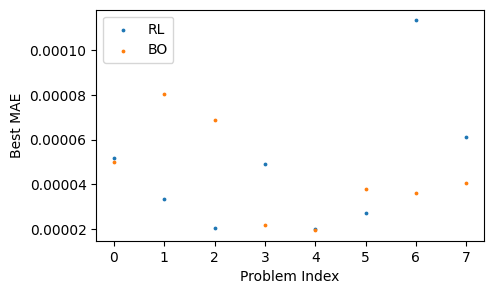

In [19]:
plot_best_mae_over_problem(rl_real, bo_real)


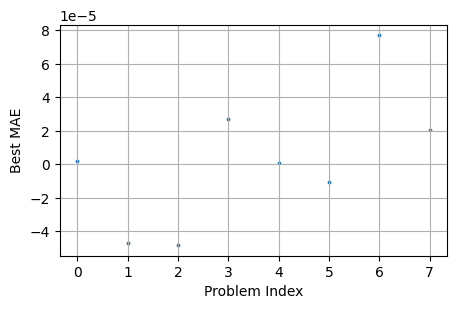

In [20]:
plot_best_mae_diff_over_problem(rl_real, bo_real)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

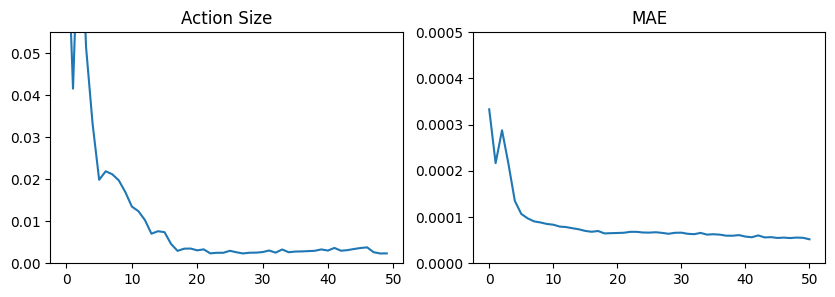

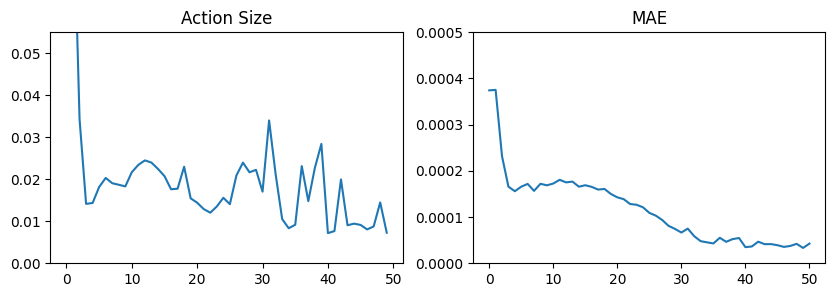

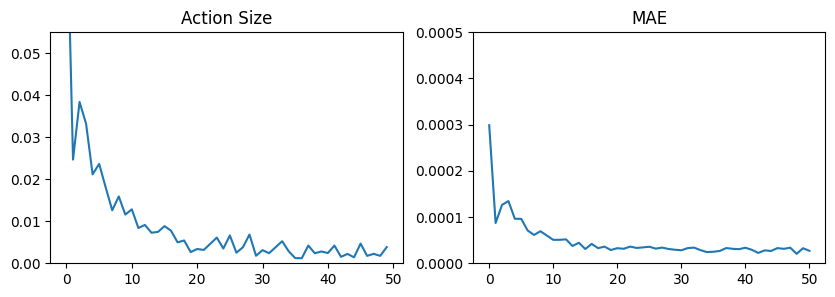

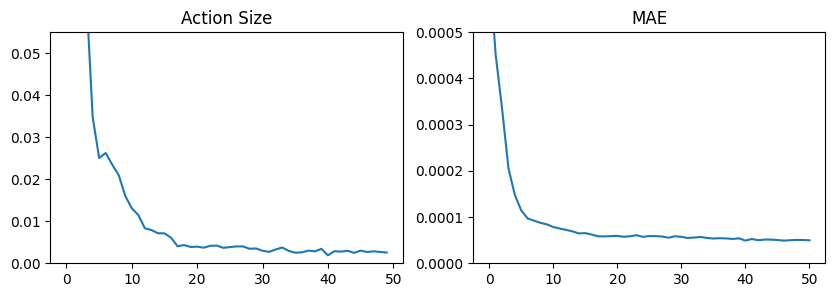

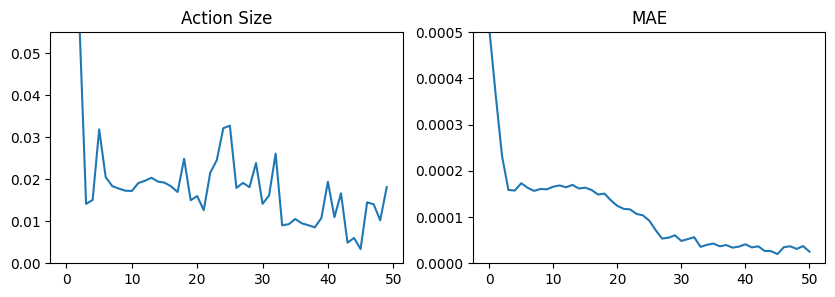

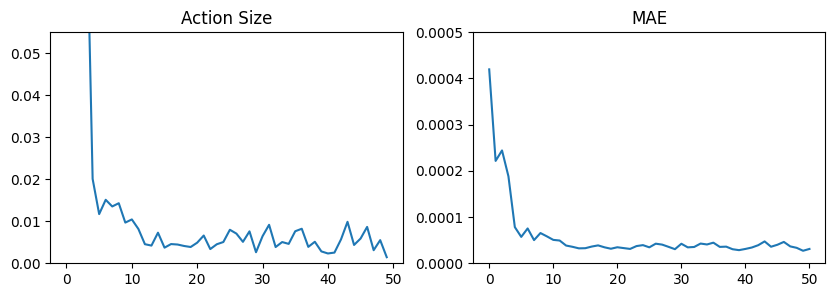

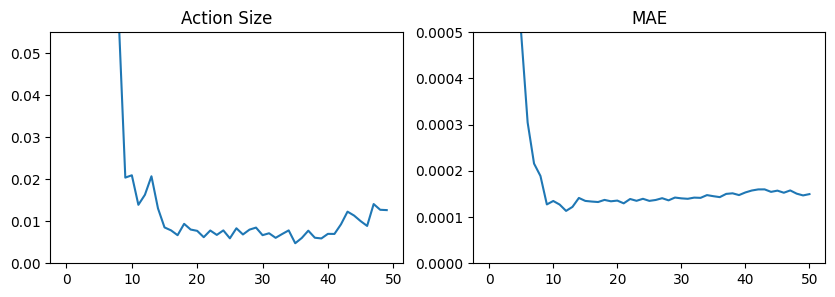

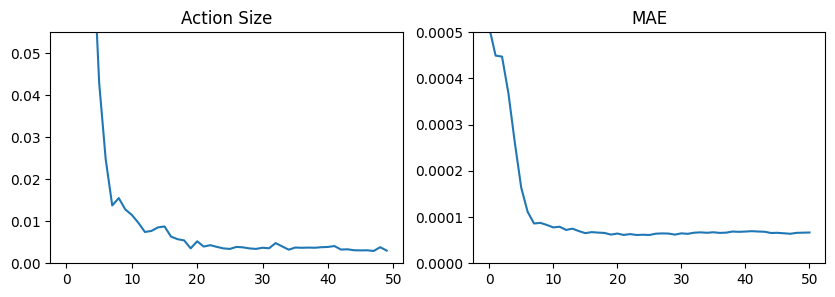

In [49]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    action_sizes = np.max(np.abs(normalized), axis=1)

    maes = get_maes(episode)

    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title("Action Size")
    plt.plot(action_sizes)
    plt.ylim(0, 0.055)
    plt.subplot(122)
    plt.title("MAE")
    plt.plot(maes)
    plt.ylim(0, 0.0005)
    plt.show()

In [ ]:
1, 4

In [45]:
rl_real[1]["observations"][0]["target"]

array([0.    , 0.0005, 0.    , 0.    ], dtype=float32)

In [46]:
rl_real[4]["observations"][0]["target"]

array([-0.001 ,  0.0005,  0.    ,  0.    ], dtype=float32)

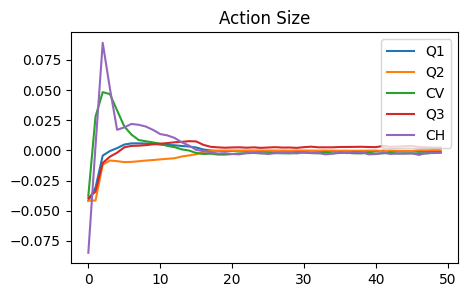

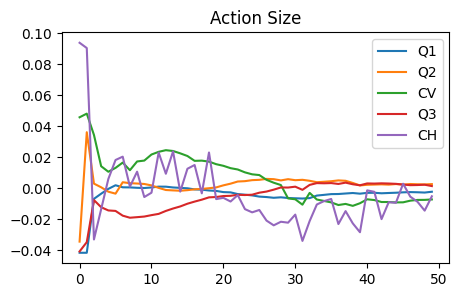

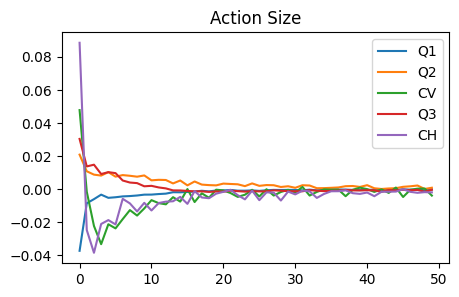

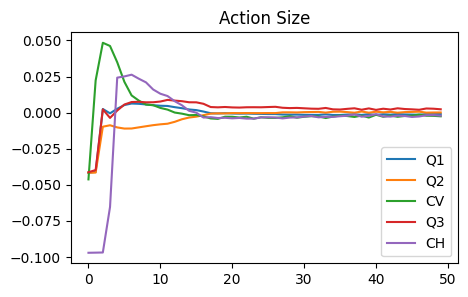

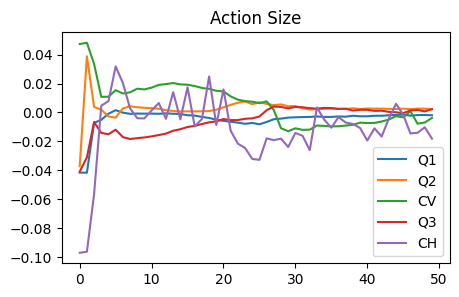

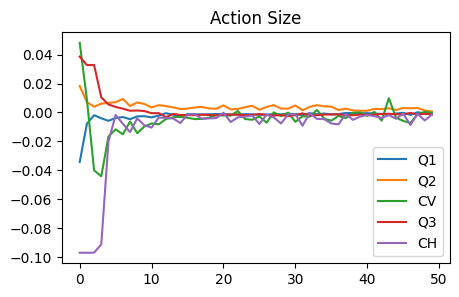

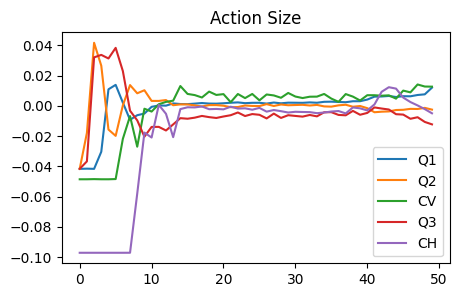

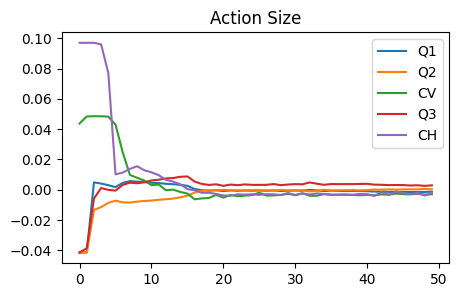

In [61]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    normalized = normalized

    plt.figure(figsize=(5, 3))
    plt.title("Action Size")
    plt.plot(normalized[:,0], label="Q1")
    plt.plot(normalized[:,1], label="Q2")
    plt.plot(normalized[:,2], label="CV")
    plt.plot(normalized[:,3], label="Q3")
    plt.plot(normalized[:,4], label="CH")
    plt.legend()
    plt.show()

In [57]:
rl_real[0]["observations"][0]["beam"]

array([0.00035522, 0.00011841, 0.00010399, 0.00075537], dtype=float32)

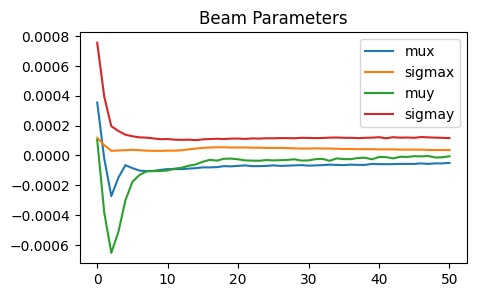

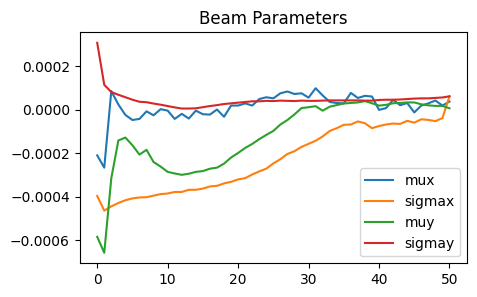

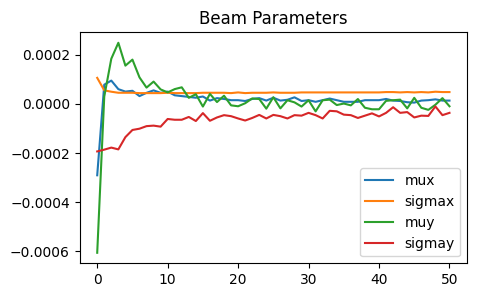

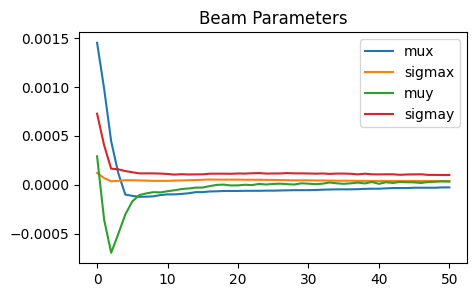

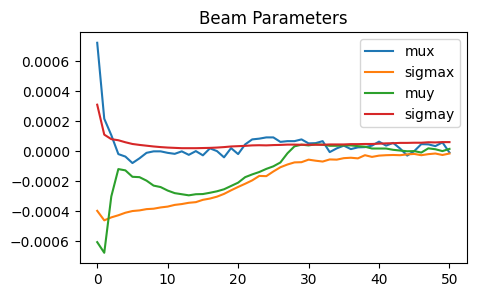

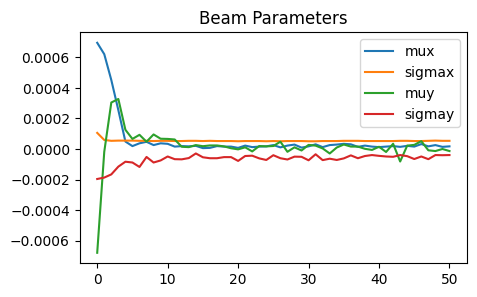

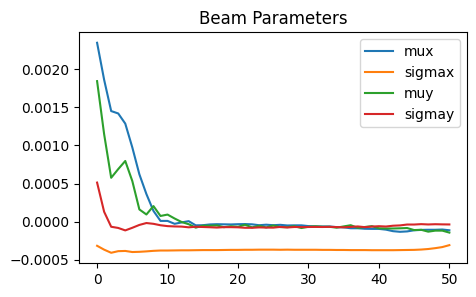

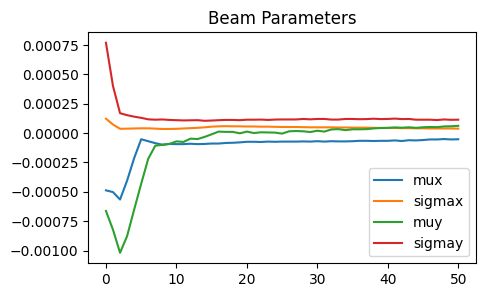

In [64]:
for episode in rl_real:
    beams = np.stack([obs["beam"] for obs in episode["observations"]])
    targets = np.stack([obs["target"] for obs in episode["observations"]])

    diffs = beams - targets

    plt.figure(figsize=(5, 3))
    plt.title("Beam Parameters")
    plt.plot(diffs[:,0], label="mux")
    plt.plot(diffs[:,1], label="sigmax")
    plt.plot(diffs[:,2], label="muy")
    plt.plot(diffs[:,3], label="sigmay")
    plt.legend()
    plt.show()

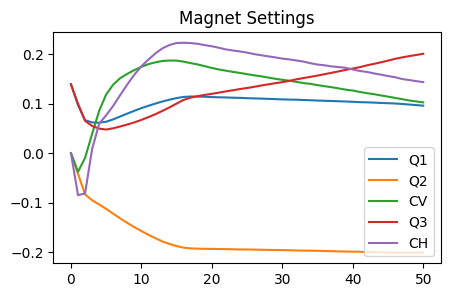

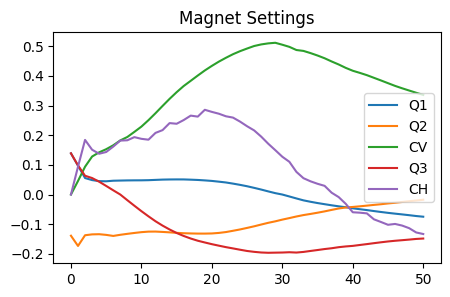

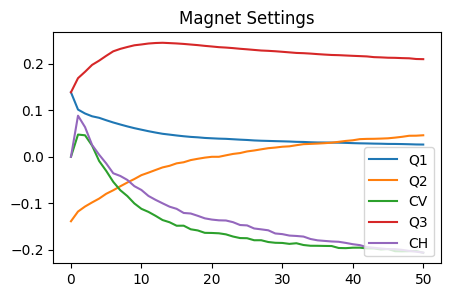

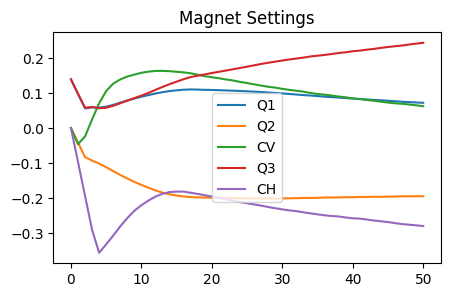

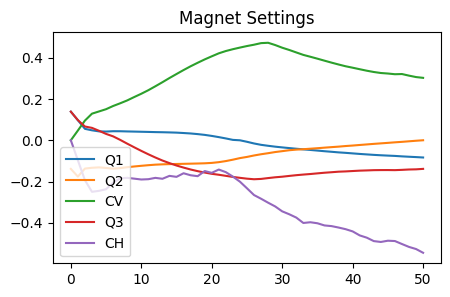

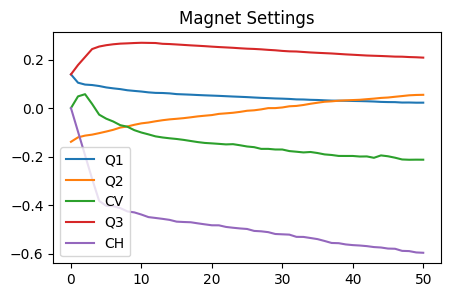

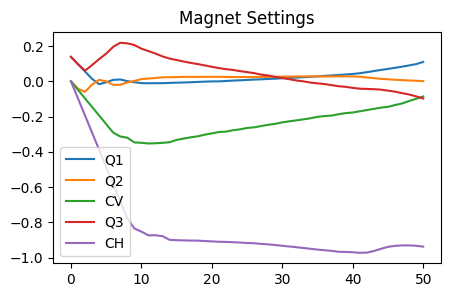

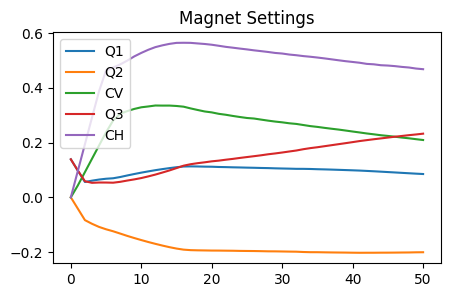

In [65]:
for episode in rl_real:
    magnets = np.stack([obs["magnets"] for obs in episode["observations"]])
    normalized = magnets / [72, 72, 6.1782e-3, 72, 6.1782e-3]


    plt.figure(figsize=(5, 3))
    plt.title("Magnet Settings")
    plt.plot(normalized[:,0], label="Q1")
    plt.plot(normalized[:,1], label="Q2")
    plt.plot(normalized[:,2], label="CV")
    plt.plot(normalized[:,3], label="Q3")
    plt.plot(normalized[:,4], label="CH")
    plt.legend()
    plt.show()

2.278259489685297e-05


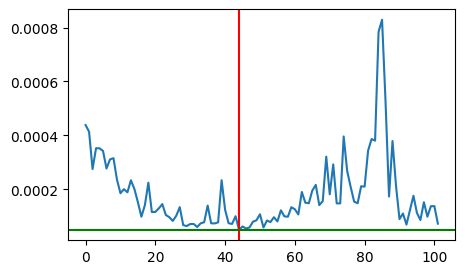

1.614642678759992e-05


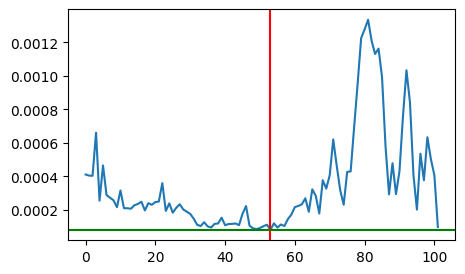

1.1036958312615752e-05


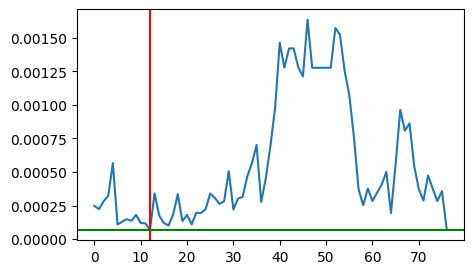

4.172931585344486e-05


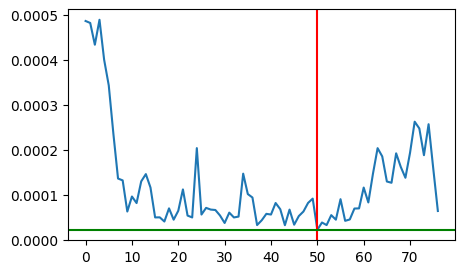

2.863457120838575e-05


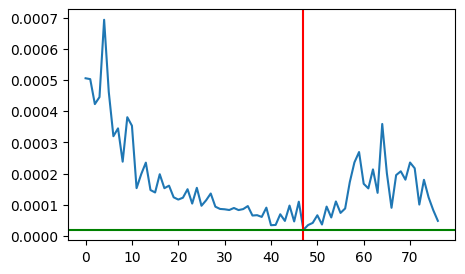

2.101667269016616e-05


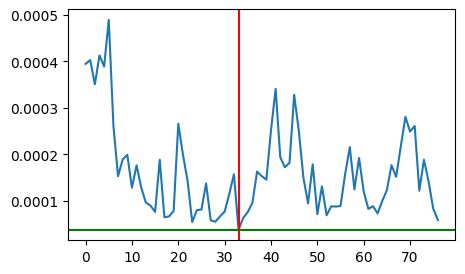

1.475865428801626e-05


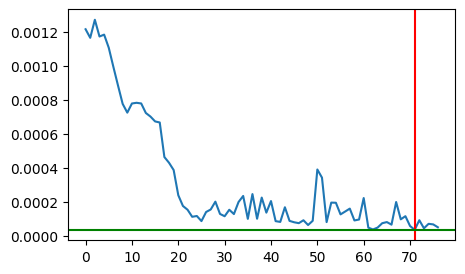

3.146382005070336e-05


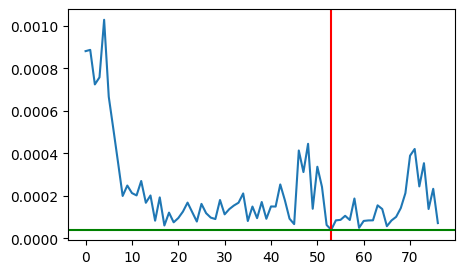

In [81]:
for episode in bo_real:
    maes = get_maes(episode)
    first = np.argmin(maes)

    print(abs(maes[first] - maes[-1]))

    plt.figure(figsize=(5, 3))
    plt.plot(maes)
    plt.axvline(first, c="red")
    plt.axhline(maes[first], c="green")
    plt.show()